In [ ]:
!pip install scikit-fuzzy --quiet

In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## MODELAGEM DAS VARIÁVEIS DO PROBLEMA

In [ ]:
three_months = np.arange(0, 3, 0.1)
six_months = np.arange(0, 6, 0.1)
nine_months = np.arange(0, 9, 0.1)

score_verde = ctrl.Consequent(np.arange(0, 100, 0.25), 'Score para faixa etária')
score_rosa = ctrl.Consequent(np.arange(0, 100, 0.25), 'Score para faixa etária')
score_azul = ctrl.Consequent(np.arange(0, 100, 0.25), 'Score para faixa etária')
score_amarelo = ctrl.Consequent(np.arange(0, 100, 0.25), 'Score para faixa etária')

In [ ]:
class MarcoDeDesenvolvimentoVerde:
    def __init__(self, marco):
        self.marco = ctrl.Antecedent(three_months, marco)
        #MUDAR 'PRESENTE' PARA 'POSSUI' [OK]'
        self.marco['possui'] = fuzz.trapmf(self.marco.universe, [0, 0, 1, 1.1])
        #MUDAR 'ATRASADO' PARA 'TARDIO / NÃO-POSSUI [OK]'
        self.marco['tardio/nao_possui'] = fuzz.trapmf(self.marco.universe, [1.1, 1.1, 2.9, 3.0])

class MarcoDeDesenvolvimentoRosa:
    def __init__(self, marco):
        self.marco = ctrl.Antecedent(three_months, marco)

        #MUDAR 'PRECOCE' PARA 'ADIANTADO [OK]'
        self.marco['adiantado'] = fuzz.trapmf(self.marco.universe, [0, 0, 0.9, 1])

        # Convertendo 'normal' para função de Bell
        # Ajustes para 'a', 'b', e 'c' refletem uma interpretação aproximada dos limites

        #MUDAR 'NORMAL' PARA 'ESPERADO [OK]'
        self.marco['esperado'] = fuzz.gbellmf(self.marco.universe, a=0.68, b=3.0, c=1.30)
        #self.marco['normal'] = fuzz.gbellmf(self.marco.universe, a=0.55, b=2, c=1.45)

        #MUDAR 'ATRASADO' PARA 'EM ATRASO [OK]'
        self.marco['em_atraso'] = fuzz.trapmf(self.marco.universe, [1.8, 2.0, 3.0, 3.0])

class MarcoDeDesenvolvimentoAzul:
    def __init__(self, marco):
        #self.marco = ctrl.Antecedent(six_months, marco)
        #self.marco['precoce'] = fuzz.trapmf(self.marco.universe, [0, 0, 1.8, 2.2])
        #self.marco['normal'] = fuzz.trapmf(self.marco.universe, [1.8, 2, 3, 4])
        #self.marco['limítrofe'] = fuzz.trapmf(self.marco.universe, [2.8, 3, 4, 4.1])
        #self.marco['não presente'] = fuzz.trapmf(self.marco.universe, [4, 4.1, 6, 6])

        self.marco = ctrl.Antecedent(six_months, marco)

        # Mantendo a definição trapezoidal para 'precoce' e 'não presente'

        #MUDAR 'PRECOCE' PARA 'ADIANTADO [OK]'
        self.marco['adiantado'] = fuzz.trapmf(self.marco.universe, [0, 0, 1.8, 2.2])

        #MUDAR 'NORMAL' PARA 'ESPERADO [OK]'
        self.marco['esperado'] = fuzz.gbellmf(self.marco.universe, a=1.1, b=2, c=2.5)

        #MUDAR 'LIMÍTROFE' PARA 'TARDIO [OK]'
        self.marco['tardio'] = fuzz.gbellmf(self.marco.universe, a=0.6, b=2, c=3.5)

        #MUDAR 'NÃO PRESENTE' PARA 'EM ATRASO [OK]'
        self.marco['em_atraso'] = fuzz.trapmf(self.marco.universe, [4, 4.1, 6, 6])

class MarcoDeDesenvolvimentoAmarelo:
    def __init__(self, marco):
        #self.marco = ctrl.Antecedent(six_months, marco)
        #self.marco['precoce'] = fuzz.trapmf(self.marco.universe, [0, 0, 1.8, 2.2])
        #self.marco['normal'] = fuzz.trapmf(self.marco.universe, [1.8, 2, 3, 4])
        #self.marco['limítrofe'] = fuzz.trapmf(self.marco.universe, [2.8, 3, 4, 4.1])
        #self.marco['não presente'] = fuzz.trapmf(self.marco.universe, [4, 4.1, 6, 6])

        self.marco = ctrl.Antecedent(nine_months, marco)

        # Mantendo a definição trapezoidal para 'precoce' e 'não presente [OK]'
        self.marco['adiantado'] = fuzz.trapmf(self.marco.universe, [0, 0, 2.5, 4.2])
        self.marco['esperado'] = fuzz.gbellmf(self.marco.universe, a=1, b=2.4, c=4.5)
        self.marco['tardio'] = fuzz.gbellmf(self.marco.universe, a=0.8, b=2, c=5.5)
        self.marco['em_atraso'] = fuzz.trapmf(self.marco.universe, [5.8, 6, 9, 9])

## Marco Verde

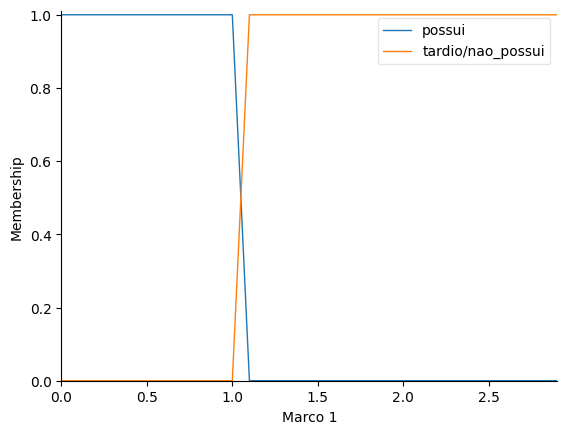

In [ ]:
marco01 = MarcoDeDesenvolvimentoVerde('Marco 1').marco
marco01.view()

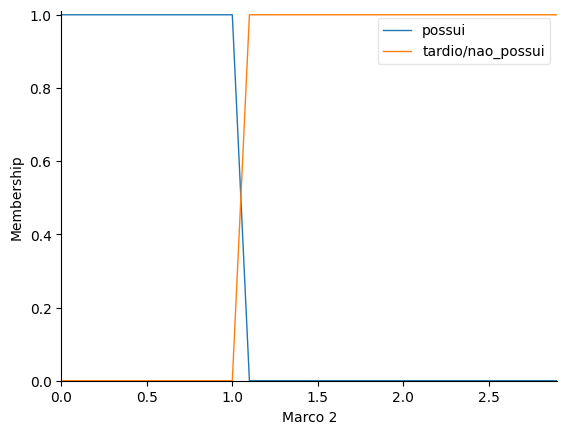

In [ ]:
marco02 = MarcoDeDesenvolvimentoVerde('Marco 2').marco
marco02.view()

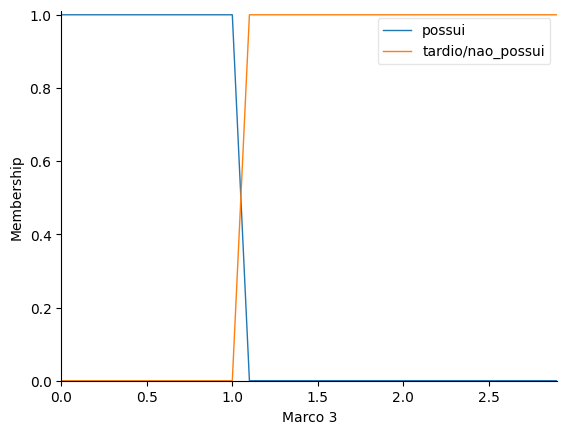

In [ ]:
marco03 = MarcoDeDesenvolvimentoVerde('Marco 3').marco
marco03.view()

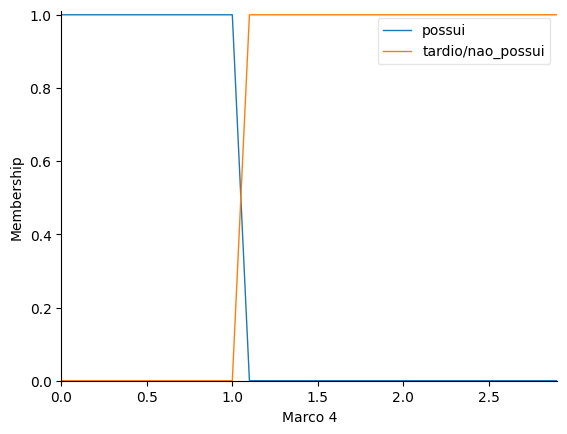

In [ ]:
marco04 = MarcoDeDesenvolvimentoVerde('Marco 4').marco
marco04.view()

## Marco Rosa

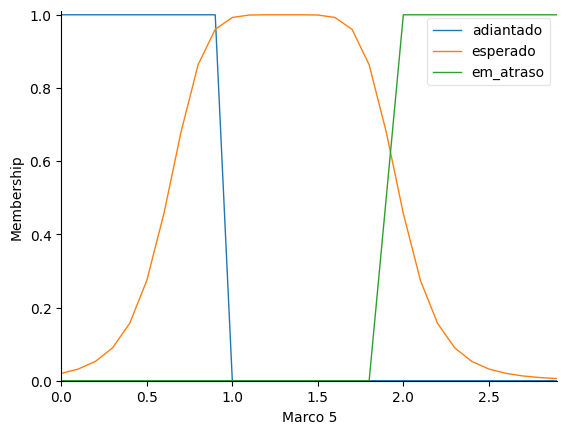

In [ ]:
marco05 = MarcoDeDesenvolvimentoRosa('Marco 5').marco
marco05.view()

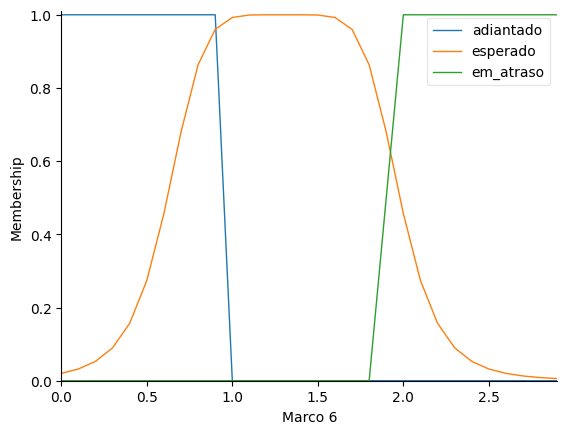

In [ ]:
marco06 = MarcoDeDesenvolvimentoRosa('Marco 6').marco
marco06.view()

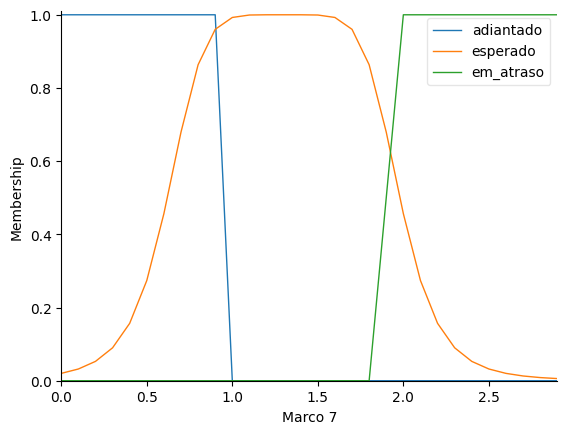

In [ ]:
marco07 = MarcoDeDesenvolvimentoRosa('Marco 7').marco
marco07.view()

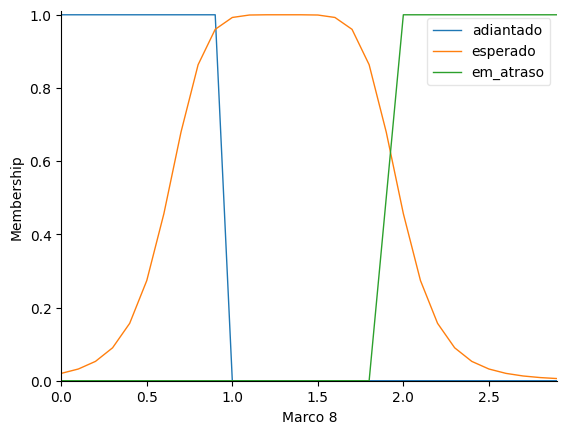

In [ ]:
marco08 = MarcoDeDesenvolvimentoRosa('Marco 8').marco
marco08.view()

## Marco Azul

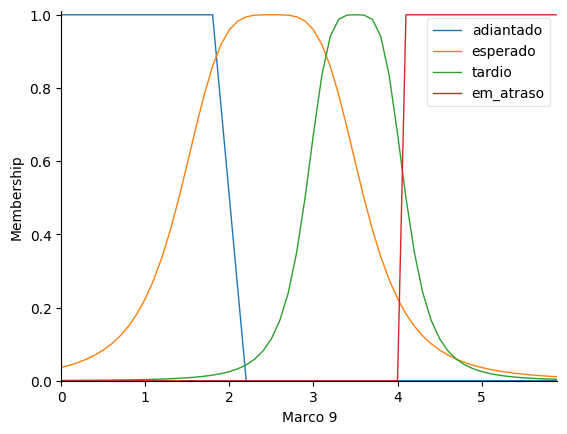

In [ ]:
marco09 = MarcoDeDesenvolvimentoAzul('Marco 9').marco
marco09.view()

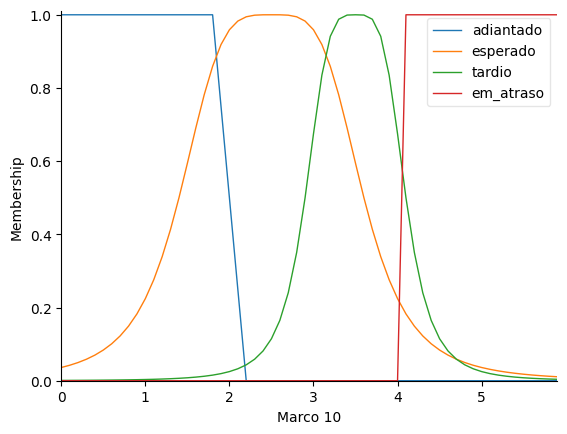

In [ ]:
marco10 = MarcoDeDesenvolvimentoAzul('Marco 10').marco
marco10.view()

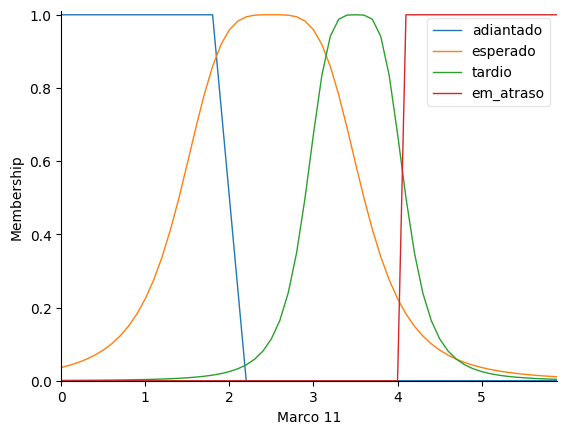

In [ ]:
marco11 = MarcoDeDesenvolvimentoAzul('Marco 11').marco
marco11.view()

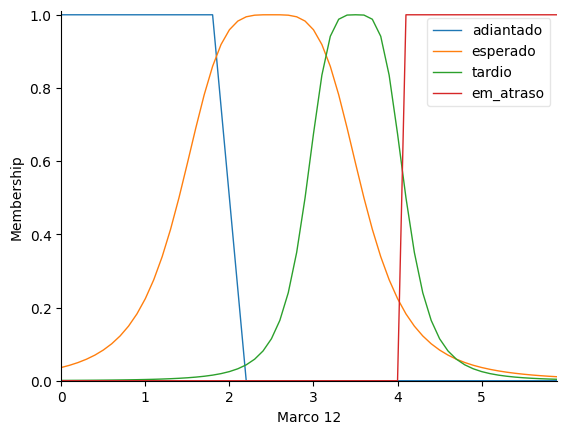

In [ ]:
marco12 = MarcoDeDesenvolvimentoAzul('Marco 12').marco
marco12.view()

## Marco Amarelo

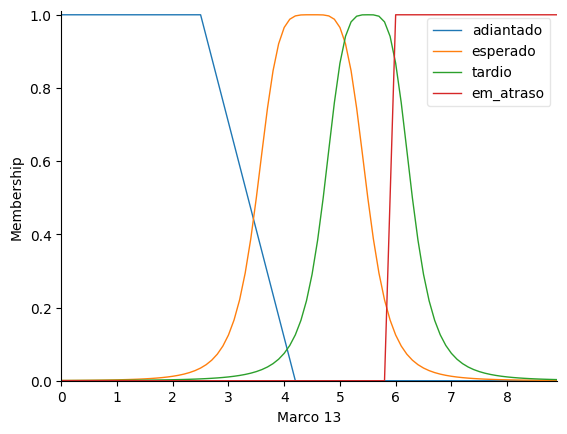

In [ ]:
marco13 = MarcoDeDesenvolvimentoAmarelo('Marco 13').marco
marco13.view()

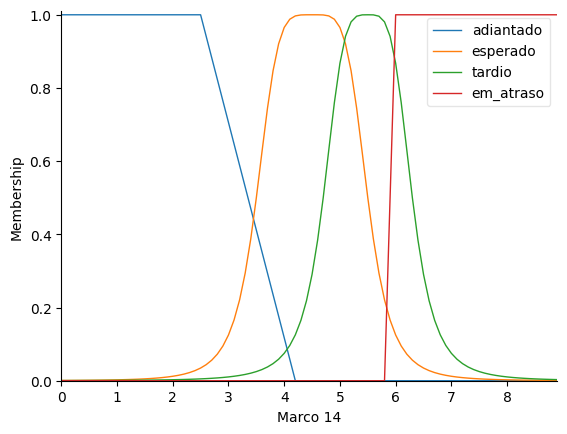

In [ ]:
marco14 = MarcoDeDesenvolvimentoAmarelo('Marco 14').marco
marco14.view()

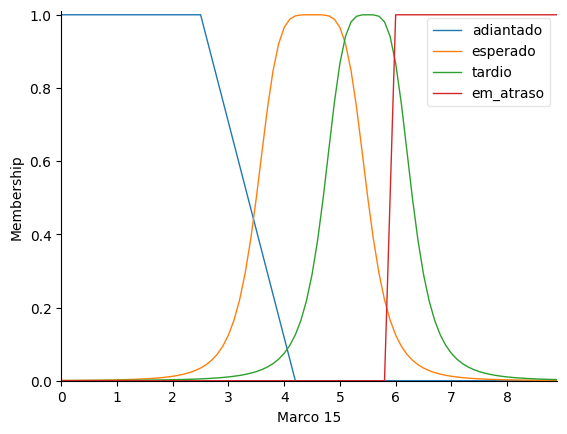

In [ ]:
marco15 = MarcoDeDesenvolvimentoAmarelo('Marco 15').marco
marco15.view()

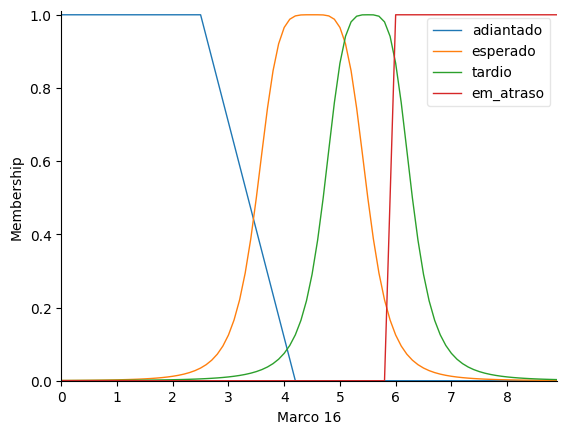

In [ ]:
marco16 = MarcoDeDesenvolvimentoAmarelo('Marco 16').marco
marco16.view()

## Score

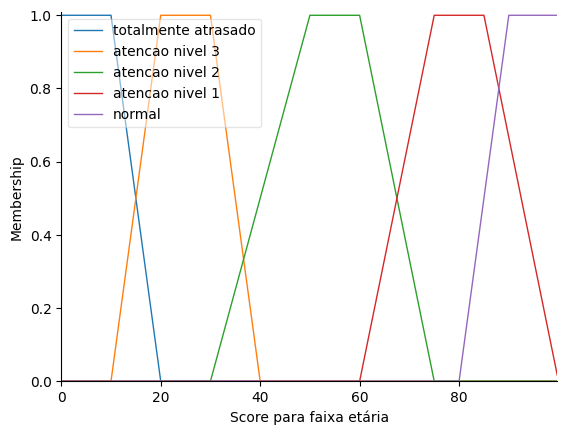

In [ ]:
score_verde['totalmente atrasado'] = fuzz.trapmf(score_verde.universe, [0, 0, 10, 20])
score_verde['atencao nivel 3'] = fuzz.trapmf(score_verde.universe, [10, 20, 30, 40])
score_verde['atencao nivel 2'] = fuzz.trapmf(score_verde.universe, [30, 50, 60, 75])
score_verde['atencao nivel 1'] = fuzz.trapmf(score_verde.universe, [60, 75, 85, 100])
score_verde['normal'] = fuzz.trapmf(score_verde.universe, [80, 90, 100, 100])

#score_verde.automf(number=3, names=['baixo', 'medio', 'alto'])

score_verde.view()

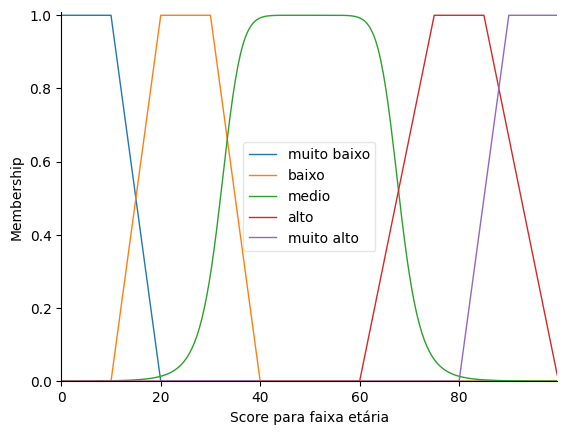

In [ ]:
#

score_rosa['muito baixo'] = fuzz.trapmf(score_rosa.universe, [0, 0, 10, 20])
score_rosa['baixo'] = fuzz.trapmf(score_rosa.universe, [10, 20, 30, 40])
score_rosa['medio'] = fuzz.gbellmf(score_rosa.universe, a=18, b=4.2, c=50)
#score_rosa['medio'] = fuzz.trapmf(score_rosa.universe, [30, 50, 60, 75])
score_rosa['alto'] = fuzz.trapmf(score_rosa.universe, [60, 75, 85, 100])
score_rosa['muito alto'] = fuzz.trapmf(score_rosa.universe, [80, 90, 100, 100])

#score_rosa.automf(number=3, names=['baixo', 'medio', 'alto'])

score_rosa.view()

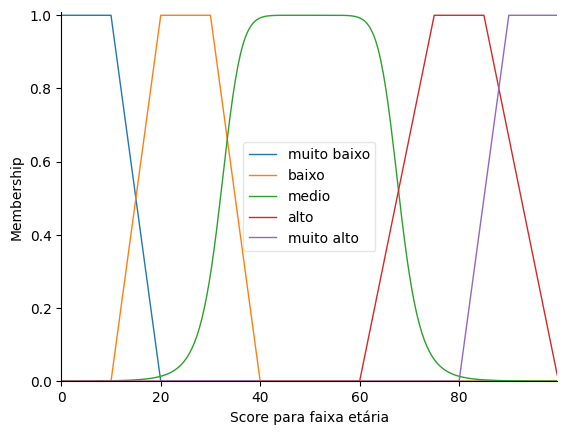

In [ ]:
#

score_azul['muito baixo'] = fuzz.trapmf(score_azul.universe, [0, 0, 10, 20])
score_azul['baixo'] = fuzz.trapmf(score_azul.universe, [10, 20, 30, 40])
score_azul['medio'] = fuzz.gbellmf(score_azul.universe, a=18, b=4.2, c=50)
#score_azul['medio'] = fuzz.trapmf(score_azul.universe, [30, 50, 60, 75])
score_azul['alto'] = fuzz.trapmf(score_azul.universe, [60, 75, 85, 100])
score_azul['muito alto'] = fuzz.trapmf(score_azul.universe, [80, 90, 100, 100])

#score_azul.automf(number=3, names=['baixo', 'medio', 'alto'])

score_azul.view()

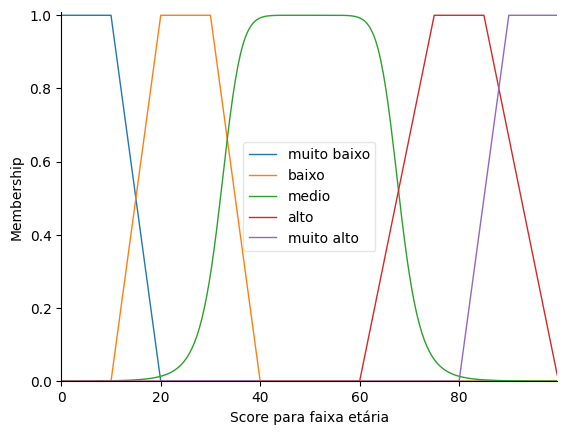

In [ ]:
#

score_amarelo['muito baixo'] = fuzz.trapmf(score_amarelo.universe, [0, 0, 10, 20])
score_amarelo['baixo'] = fuzz.trapmf(score_amarelo.universe, [10, 20, 30, 40])
score_amarelo['medio'] = fuzz.gbellmf(score_amarelo.universe, a=18, b=4.2, c=50)
#score_amarelo['medio'] = fuzz.trapmf(score_amarelo.universe, [30, 50, 60, 75])
score_amarelo['alto'] = fuzz.trapmf(score_amarelo.universe, [60, 75, 85, 100])
score_amarelo['muito alto'] = fuzz.trapmf(score_amarelo.universe, [80, 90, 100, 100])

#score_amarelo.automf(number=3, names=['baixo', 'medio', 'alto'])

score_amarelo.view()

## **BASE DE REGRAS**

In [ ]:
#['possui', 'tardio/nao_possui'] - MARCOS VERDE

rule1_verde = ctrl.Rule(marco01['possui'] & marco02['possui'] & marco03['possui'] & marco04['possui'], score_verde['normal'])

rule2_verde = ctrl.Rule(marco01['possui'] & marco02['possui'] & marco03['possui'] & marco04['tardio/nao_possui'], score_verde['atencao nivel 1'])
rule3_verde = ctrl.Rule(marco01['possui'] & marco02['possui'] & marco03['tardio/nao_possui'] & marco04['possui'], score_verde['atencao nivel 1'])
rule4_verde = ctrl.Rule(marco01['possui'] & marco02['tardio/nao_possui'] & marco03['possui'] & marco04['possui'], score_verde['atencao nivel 1'])
rule5_verde = ctrl.Rule(marco01['tardio/nao_possui'] & marco02['possui'] & marco03['possui'] & marco04['possui'], score_verde['atencao nivel 1'])

rule6_verde = ctrl.Rule(marco01['possui'] & marco02['possui'] & marco03['tardio/nao_possui'] & marco04['tardio/nao_possui'], score_verde['atencao nivel 2'])
rule7_verde = ctrl.Rule(marco01['possui'] & marco02['tardio/nao_possui'] & marco03['possui'] & marco04['tardio/nao_possui'], score_verde['atencao nivel 2'])
rule8_verde = ctrl.Rule(marco01['tardio/nao_possui'] & marco02['possui'] & marco03['possui'] & marco04['tardio/nao_possui'], score_verde['atencao nivel 2'])
rule9_verde = ctrl.Rule(marco01['possui'] & marco02['tardio/nao_possui'] & marco03['tardio/nao_possui'] & marco04['possui'], score_verde['atencao nivel 2'])
rule10_verde = ctrl.Rule(marco01['tardio/nao_possui'] & marco02['possui'] & marco03['tardio/nao_possui'] & marco04['possui'], score_verde['atencao nivel 2'])
rule11_verde = ctrl.Rule(marco01['tardio/nao_possui'] & marco02['tardio/nao_possui'] & marco03['possui'] & marco04['possui'], score_verde['atencao nivel 2'])

rule12_verde = ctrl.Rule(marco01['possui'] & marco02['tardio/nao_possui'] & marco03['tardio/nao_possui'] & marco04['tardio/nao_possui'], score_verde['atencao nivel 3'])
rule13_verde = ctrl.Rule(marco01['tardio/nao_possui'] & marco02['possui'] & marco03['tardio/nao_possui'] & marco04['tardio/nao_possui'], score_verde['atencao nivel 3'])
rule14_verde = ctrl.Rule(marco01['tardio/nao_possui'] & marco02['tardio/nao_possui'] & marco03['possui'] & marco04['tardio/nao_possui'], score_verde['atencao nivel 3'])
rule15_verde = ctrl.Rule(marco01['tardio/nao_possui'] & marco02['tardio/nao_possui'] & marco03['tardio/nao_possui'] & marco04['possui'], score_verde['atencao nivel 3'])

rule16_verde = ctrl.Rule(marco01['tardio/nao_possui'] & marco02['tardio/nao_possui'] & marco03['tardio/nao_possui'] & marco04['tardio/nao_possui'], score_verde['totalmente atrasado'])


In [ ]:
#['adiantado', 'esperado', 'em_atraso'] - MARCOS ROSA

# Regras iniciais já definidas
rule1_rosa = ctrl.Rule(marco05['adiantado'] & marco06['adiantado'] & marco07['adiantado'] & marco08['adiantado'], score_rosa['muito alto'])
rule2_rosa = ctrl.Rule(marco05['esperado'] & marco06['adiantado'] & marco07['adiantado'] & marco08['adiantado'], score_rosa['muito alto'])
rule3_rosa = ctrl.Rule(marco05['adiantado'] & marco06['esperado'] & marco07['adiantado'] & marco08['adiantado'], score_rosa['muito alto'])
rule4_rosa = ctrl.Rule(marco05['adiantado'] & marco06['adiantado'] & marco07['esperado'] & marco08['adiantado'], score_rosa['muito alto'])
rule5_rosa = ctrl.Rule(marco05['adiantado'] & marco06['adiantado'] & marco07['adiantado'] & marco08['esperado'], score_rosa['muito alto'])

rule6_rosa = ctrl.Rule(marco05['esperado'] & marco06['esperado'] & marco07['adiantado'] & marco08['adiantado'], score_rosa['alto'])
rule7_rosa = ctrl.Rule(marco05['esperado'] & marco06['adiantado'] & marco07['esperado'] & marco08['adiantado'], score_rosa['alto'])
rule8_rosa = ctrl.Rule(marco05['esperado'] & marco06['adiantado'] & marco07['adiantado'] & marco08['esperado'], score_rosa['alto'])

rule9_rosa = ctrl.Rule(marco05['adiantado'] & marco06['esperado'] & marco07['esperado'] & marco08['adiantado'], score_rosa['alto'])
rule10_rosa = ctrl.Rule(marco05['adiantado'] & marco06['esperado'] & marco07['adiantado'] & marco08['esperado'], score_rosa['alto'])
rule11_rosa = ctrl.Rule(marco05['adiantado'] & marco06['adiantado'] & marco07['esperado'] & marco08['esperado'], score_rosa['alto'])

rule12_rosa = ctrl.Rule(marco05['adiantado'] & marco06['esperado'] & marco07['esperado'] & marco08['esperado'], score_rosa['alto'])
rule13_rosa = ctrl.Rule(marco05['esperado'] & marco06['adiantado'] & marco07['esperado'] & marco08['esperado'], score_rosa['alto'])
rule14_rosa = ctrl.Rule(marco05['esperado'] & marco06['esperado'] & marco07['adiantado'] & marco08['esperado'], score_rosa['alto'])
rule15_rosa = ctrl.Rule(marco05['esperado'] & marco06['esperado'] & marco07['esperado'] & marco08['adiantado'], score_rosa['alto'])

rule16_rosa = ctrl.Rule(marco05['em_atraso'] & marco06['em_atraso'] & marco07['em_atraso'] & marco08['em_atraso'], score_rosa['muito baixo'])

# A partir daqui, as regras são exemplos gerados para ilustração. Elas devem ser ajustadas conforme as necessidades específicas do sistema e os conhecimentos do domínio.
rule17_rosa = ctrl.Rule(marco05['adiantado'] & marco06['adiantado'] & marco07['adiantado'] & marco08['adiantado'], score_rosa['muito alto'])
rule18_rosa = ctrl.Rule(marco05['adiantado'] & marco06['adiantado'] & marco07['adiantado'] & marco08['adiantado'], score_rosa['muito alto'])
rule19_rosa = ctrl.Rule(marco05['esperado'] & marco06['esperado'] & marco07['esperado'] & marco08['esperado'], score_rosa['alto'])
rule20_rosa = ctrl.Rule(marco05['em_atraso'] & marco06['em_atraso'] & marco07['em_atraso'] & marco08['em_atraso'], score_rosa['muito baixo'])
rule21_rosa = ctrl.Rule(marco05['adiantado'] & marco06['adiantado'] & marco07['em_atraso'] & marco08['em_atraso'], score_rosa['baixo'])
rule22_rosa = ctrl.Rule(marco05['adiantado'] & marco06['esperado'] & marco07['em_atraso'] & marco08['adiantado'], score_rosa['medio'])
rule23_rosa = ctrl.Rule(marco05['em_atraso'] & marco06['em_atraso'] & marco07['esperado'] & marco08['esperado'], score_rosa['baixo'])
rule24_rosa = ctrl.Rule(marco05['esperado'] & marco06['adiantado'] & marco07['em_atraso'] & marco08['esperado'], score_rosa['medio'])
rule25_rosa = ctrl.Rule(marco05['adiantado'] & marco06['em_atraso'] & marco07['esperado'] & marco08['esperado'], score_rosa['medio'])


In [ ]:
#['adiantado', 'esperado', 'tardio', 'em_atraso'] - MARCO AZUL

# Regras iniciais já definidas
rule1_azul = ctrl.Rule(marco09['adiantado'] & marco10['adiantado'] & marco11['adiantado'] & marco12['adiantado'], score_azul['muito alto'])
rule2_azul = ctrl.Rule(marco09['esperado'] & marco10['esperado'] & marco11['esperado'] & marco12['esperado'], score_azul['alto'])
rule3_azul = ctrl.Rule(marco09['tardio'] & marco10['tardio'] & marco11['tardio'] & marco12['tardio'], score_azul['baixo'])
rule4_azul = ctrl.Rule(marco09['em_atraso'] & marco10['em_atraso'] & marco11['em_atraso'] & marco12['em_atraso'], score_azul['muito baixo'])

# Gerando as regras adicionais
rule5_azul = ctrl.Rule(marco09['em_atraso'] & (marco10['esperado'] | marco10['em_atraso']) & (marco11['esperado'] | marco11['em_atraso']) & marco12['em_atraso'], score_azul['baixo'])
rule6_azul = ctrl.Rule((marco09['adiantado'] | marco09['esperado']) & (marco10['adiantado'] | marco10['esperado']) & (marco11['adiantado'] | marco11['esperado']) & (marco12['adiantado'] | marco12['esperado']), score_azul['alto'])
rule7_azul = ctrl.Rule(marco09['adiantado'] & marco10['adiantado'] & marco11['adiantado'] & (marco12['esperado'] | marco12['adiantado']), score_azul['alto'])
rule8_azul = ctrl.Rule((marco09['adiantado'] | marco09['esperado']) & marco10['adiantado'] & marco11['adiantado'] & marco12['adiantado'], score_azul['muito alto'])
rule9_azul = ctrl.Rule(marco09['tardio'] & marco10['tardio'] & marco11['tardio'] & marco12['tardio'], score_azul['muito baixo'])

rule10_azul = ctrl.Rule(marco09['adiantado'] & marco10['esperado'] & marco11['esperado'] & marco12['esperado'], score_azul['alto'])

rule11_azul = ctrl.Rule(marco09['esperado'] & marco10['esperado'] & marco11['esperado'] & marco12['adiantado'], score_azul['alto'])

rule12_azul = ctrl.Rule(marco09['adiantado'] & marco10['adiantado'] & marco11['esperado'] & marco12['adiantado'], score_azul['muito alto'])

rule13_azul = ctrl.Rule(marco09['adiantado'] & marco10['adiantado'] & marco11['tardio'] & marco12['adiantado'], score_azul['alto'])

rule14_azul = ctrl.Rule(marco09['tardio'] & marco10['adiantado'] & marco11['adiantado'] & marco12['tardio'], score_azul['baixo'])


In [ ]:
#['adiantado', 'esperado', 'tardio', 'em_atraso'] - MARCO AMARELO

# Regras iniciais já definidas
rule1_amarelo = ctrl.Rule(marco13['adiantado'] & marco14['adiantado'] & marco15['adiantado'] & marco16['adiantado'], score_amarelo['muito alto'])
rule2_amarelo = ctrl.Rule(marco13['esperado'] & marco14['esperado'] & marco15['esperado'] & marco16['esperado'], score_amarelo['alto'])
rule3_amarelo = ctrl.Rule(marco13['tardio'] & marco14['tardio'] & marco15['tardio'] & marco16['tardio'], score_amarelo['baixo'])
rule4_amarelo = ctrl.Rule(marco13['em_atraso'] & marco14['em_atraso'] & marco15['em_atraso'] & marco16['em_atraso'], score_amarelo['muito baixo'])

# Gerando as regras adicionais
rule5_amarelo = ctrl.Rule((marco13['esperado'] | marco13['tardio']) & (marco14['esperado'] | marco14['tardio']) & (marco15['esperado'] | marco15['tardio']) & (marco16['esperado'] | marco16['tardio']), score_amarelo['medio'])
rule6_amarelo = ctrl.Rule(marco13['esperado'] & marco14['esperado'] & marco15['em_atraso'] & marco16['em_atraso'], score_amarelo['baixo'])
rule7_amarelo = ctrl.Rule(marco13['adiantado'] & marco14['adiantado'] & marco15['adiantado'] & (marco16['esperado'] | marco16['adiantado']), score_amarelo['alto'])
rule8_amarelo = ctrl.Rule((marco13['adiantado'] | marco13['esperado']) & marco14['adiantado'] & marco15['adiantado'] & marco16['adiantado'], score_amarelo['muito alto'])
rule9_amarelo = ctrl.Rule(marco13['tardio'] & marco14['tardio'] & marco15['tardio'] & marco16['tardio'], score_amarelo['muito baixo'])


## Predição

In [ ]:
score_predicao_verde = ctrl.ControlSystem([rule1_verde, rule2_verde, rule3_verde, rule4_verde,
                                     rule5_verde, rule6_verde, rule7_verde, rule8_verde,
                                     rule9_verde, rule10_verde, rule11_verde, rule12_verde,
                                     rule13_verde, rule14_verde, rule15_verde, rule16_verde])

recomendacao_verde = ctrl.ControlSystemSimulation(score_predicao_verde)

In [ ]:
score_predicao_rosa = ctrl.ControlSystem([
    rule1_rosa, rule2_rosa, rule3_rosa, rule4_rosa, rule5_rosa, rule6_rosa, rule7_rosa, rule8_rosa, rule9_rosa,
    rule10_rosa, rule11_rosa, rule12_rosa, rule13_rosa, rule14_rosa, rule15_rosa, rule16_rosa, rule17_rosa, rule18_rosa,
    rule19_rosa, rule20_rosa, rule21_rosa, rule22_rosa, rule23_rosa, rule24_rosa, rule25_rosa])

recomendacao_rosa = ctrl.ControlSystemSimulation(score_predicao_rosa)

In [ ]:
score_predicao_azul = ctrl.ControlSystem([
    rule1_azul, rule2_azul, rule3_azul, rule4_azul, rule5_azul, rule6_azul,
    rule7_azul, rule8_azul, rule9_azul, rule10_azul, rule11_azul, rule12_azul, rule13_azul, rule14_azul])

recomendacao_azul = ctrl.ControlSystemSimulation(score_predicao_azul)


In [ ]:
score_predicao_amarelo = ctrl.ControlSystem([
    rule1_amarelo, rule2_amarelo, rule3_amarelo, rule4_amarelo, rule5_amarelo, rule6_amarelo,
    rule7_amarelo, rule8_amarelo, rule9_amarelo])

recomendacao_amarelo = ctrl.ControlSystemSimulation(score_predicao_amarelo)

79.99834708447935


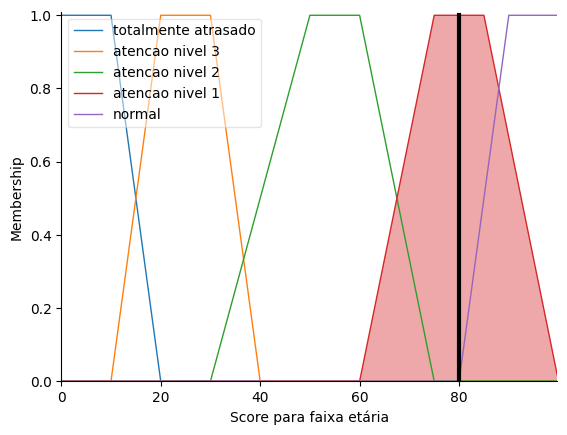

In [ ]:
recomendacao_verde.input['Marco 1'] = 1
recomendacao_verde.input['Marco 2'] = 1
recomendacao_verde.input['Marco 3'] = 1
recomendacao_verde.input['Marco 4'] = 2

recomendacao_verde.compute()

print(recomendacao_verde.output['Score para faixa etária'])
score_verde.view(sim = recomendacao_verde)

40.25083220434174


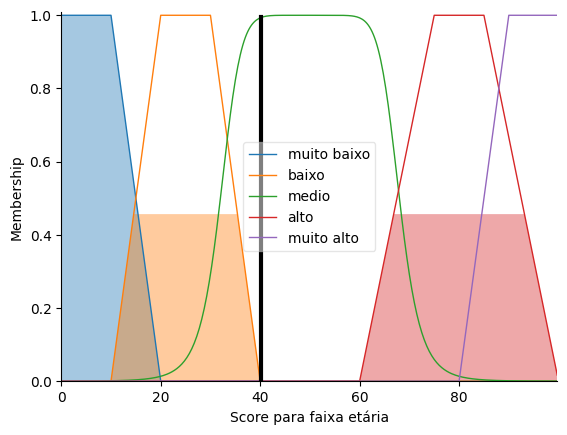

In [ ]:
recomendacao_rosa.input['Marco 5'] = 2
recomendacao_rosa.input['Marco 6'] = 2
recomendacao_rosa.input['Marco 7'] = 2
recomendacao_rosa.input['Marco 8'] = 2

recomendacao_rosa.compute()

print(recomendacao_rosa.output['Score para faixa etária'])
score_rosa.view(sim = recomendacao_rosa)

20.42832495214192


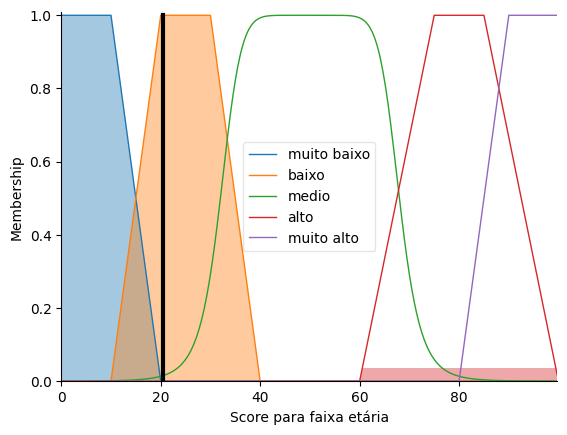

In [ ]:
recomendacao_azul.input['Marco 9'] = 5
recomendacao_azul.input['Marco 10'] = 5
recomendacao_azul.input['Marco 11'] = 5
recomendacao_azul.input['Marco 12'] = 5

recomendacao_azul.compute()

print(recomendacao_azul.output['Score para faixa etária'])
score_azul.view(sim = recomendacao_azul)


37.658321314356876


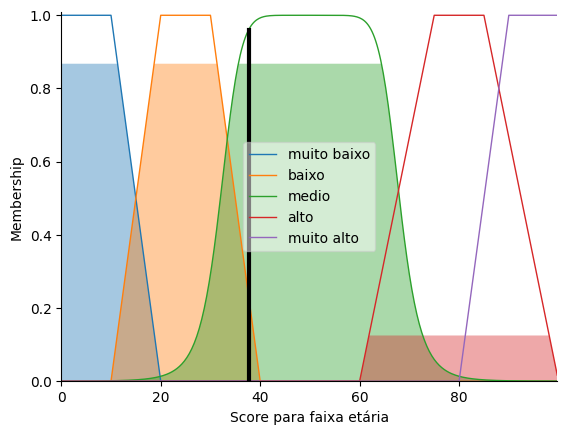

In [ ]:
recomendacao_amarelo.input['Marco 13'] = 6
recomendacao_amarelo.input['Marco 14'] = 5
recomendacao_amarelo.input['Marco 15'] = 5
recomendacao_amarelo.input['Marco 16'] = 5

recomendacao_amarelo.compute()

print(recomendacao_amarelo.output['Score para faixa etária'])
score_amarelo.view(sim = recomendacao_amarelo)


In [ ]:
score = recomendacao_verde.output['Score para faixa etária']

# Determinar o texto com base no valor retornado
if score >= 80.0:
    texto = "MARCO ATINGIDO;"
elif score >= 60.0 and score < 80.0:
    texto = "ATENÇÃO 1: PRESENÇA DE UM MARCO AUSENTE;"
elif score >= 40.0 and score < 60.0:
    texto = "ATENÇÃO 2: PRESENÇA DE DOIS MARCOS AUSENTES;"
elif score >= 20.0 and score < 40.0:
    texto = "ATENÇÃO 3: PRESENÇA DE TRÊS MARCOS AUSENTES;"
else:
    texto = "TODOS OS MARCOS ESTÃO ATRASADOS;"

# Exibir o texto
print("(MÁQUINA VERDE): ",texto)

(MÁQUINA VERDE):  ATENÇÃO 1: PRESENÇA DE UM MARCO AUSENTE;


In [ ]:
score = recomendacao_rosa.output['Score para faixa etária']

# Determinar o texto com base no valor retornado
if score >= 90.0:
    texto = "MUITO ALTO: Alta tendência a desenvolvimento precoce;"
elif score >= 70.0:
    texto = "ALTO: Presença de marcos precoces esporádicos;"
elif score >= 50.0:
    texto = "MÉDIA ACIMA DE 5.0: Desenvolvimento normal;"
elif score <= 50.0:
    texto = "BAIXO: Presença de poucos marcos com atraso, menos de 50%;"
else:
    texto = "MUITO BAIXO: Muitos marcos com atraso, acima de 50%;"

# Exibir o texto
print("(MÁQUINA ROSA): ",texto)

(MÁQUINA ROSA):  BAIXO: Presença de poucos marcos com atraso, menos de 50%;


In [ ]:
score = recomendacao_azul.output['Score para faixa etária']

# Determinar o texto com base no valor retornado
if score >= 90.0:
    texto = "MUITO ALTO: Alta tendência a desenvolvimento precoce;"
elif score >= 70.0:
    texto = "ALTO: Presença de marcos precoces esporádicos;"
elif score >= 50.0:
    texto = "MÉDIA ACIMA DE 5.0: Desenvolvimento normal;"
elif score <= 50.0:
    texto = "MÉDIA ABAIXO DE 5.0: Desenvolvimento normal com presença de marco tardio;"
elif score <= 50.0:
    texto = "BAIXO: Presença de poucos marcos com atraso, menos de 50%;"
else:
    texto = "MUITO BAIXO: Muitos marcos com atraso, acima de 50%;"

# Exibir o texto
print("(MÁQUINA AZUL): ",texto)

(MÁQUINA AZUL):  MÉDIA ABAIXO DE 5.0: Desenvolvimento normal com presença de marco tardio;


In [ ]:
score = recomendacao_amarelo.output['Score para faixa etária']

# Determinar o texto com base no valor retornado
if score >= 90.0:
    texto = "MUITO ALTO: Alta tendência a desenvolvimento precoce;"
elif score >= 70.0:
    texto = "ALTO: Presença de marcos precoces esporádicos;"
elif score >= 50.0:
    texto = "MÉDIA ACIMA DE 5.0: Desenvolvimento normal;"
elif score <= 50.0:
    texto = "MÉDIA ABAIXO DE 5.0: Desenvolvimento normal com presença de marco tardio;"
elif score <= 50.0:
    texto = "BAIXO: Presença de poucos marcos com atraso, menos de 50%;"
else:
    texto = "MUITO BAIXO: Muitos marcos com atraso, acima de 50%;"

# Exibir o texto
print("(MÁQUINA AMARELO): ",texto)

(MÁQUINA AMARELO):  MÉDIA ABAIXO DE 5.0: Desenvolvimento normal com presença de marco tardio;


## **ANÁLISE DAS SUPERFÍCIES**

In [ ]:
risco_values = np.zeros((len(_40_days), len(_40_days)))

for i, m1 in enumerate(_40_days):
    for j, m2 in enumerate(_40_days):
        recomendacao.input['Marco 1'] = m1
        recomendacao.input['Marco 2'] = m2
        recomendacao.compute()
        risco_values[i, j] = recomendacao.output['Risco']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(_40_days, _40_days)

surf = ax.plot_surface(X, Y, risco_values, cmap='viridis', edgecolor='k')

ax.set_xlabel('Marco 1')
ax.set_ylabel('Marco 2')
ax.set_zlabel('Score')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.title('Fuzzy Score Control')
plt.show()

NameError: name '_40_days' is not defined

# **DÚVIDA** (desconsiderar por enquanto)

## Marco 15: Localiza o som

In [ ]:
# Como ter 2
marco15 = ctrl.Antecedent(_12_months, '15° Marco')

marco15['levemente precoce'] = fuzz.trapmf(marco15.universe, [0, 0, 2, 4])
marco15['normal'] = fuzz.trapmf(marco15.universe, [1, 3, 6, 8])
marco15['levemente atrasado'] = fuzz.trapmf(marco15.universe, [5, 7, 9, 11])
marco15['atrasado'] = fuzz.trapmf(marco15.universe, [8, 10, 12, 12])

In [ ]:
marco15.view()

In [ ]:
marco15 = np.arange(0, 13, 0.1)

# Definição das funções de pertinência fuzzy
baixo1 = fuzz.trapmf(marco15, [0, 0, 2, 4])
baixo2 = fuzz.trapmf(marco15, [5, 7, 9, 11])

# União das funções de pertinência "baixo"
baixo = np.maximum(baixo1, baixo2)

# Visualização da função de pertinência "baixo"
plt.figure()

plt.plot(marco15, baixo, 'b', label='Baixo')

plt.title('Função de Pertinência "Baixo"')
plt.xlabel('Valor de Marco 15')
plt.ylabel('Pertinência')

plt.legend()
plt.show()